In [10]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 決策樹 Dicision Tree

實驗A
accuracy: 0.6915422885572139
recall: 0.6592632719393283
precision: 0.6613965744400527
F1 score: 0.6602508178844056


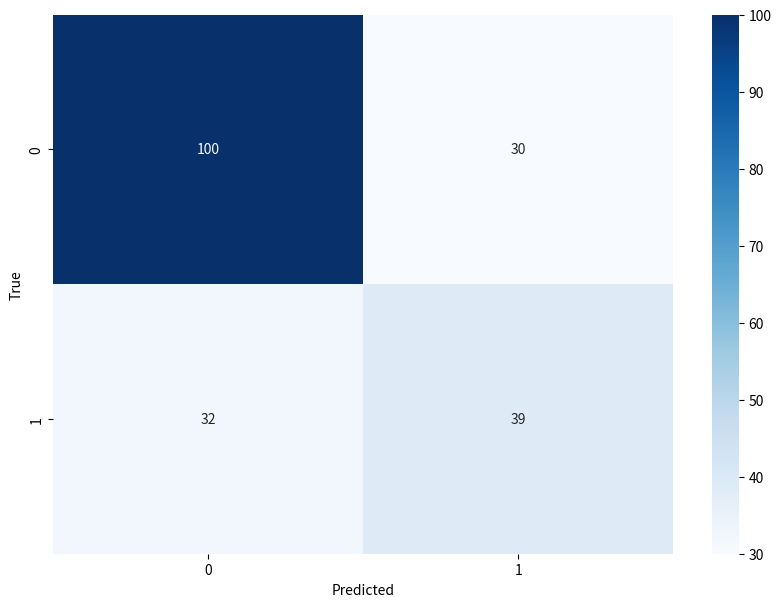

實驗B
accuracy: 0.71
recall: 0.6638781638781639
precision: 0.689484126984127
F1 score: 0.6695156695156695


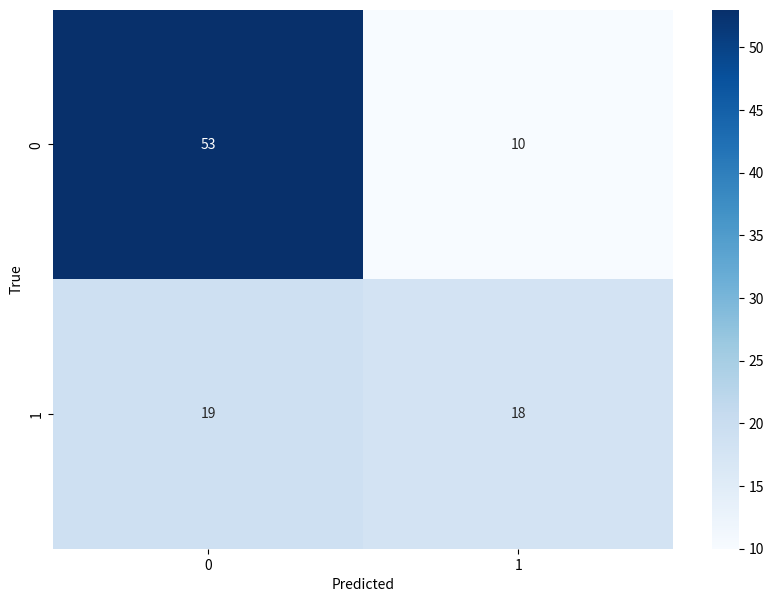

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

def analyze_experiment(train_data, test_data):
    # 準備訓練和測試數據
    train_x = train_data.drop('Outcome', axis=1)
    train_y = train_data['Outcome']
    test_x = test_data.drop('Outcome', axis=1)
    test_y = test_data['Outcome']

    # 創建決策樹模型 (使用預設參數)
    clf = DecisionTreeClassifier(random_state=1234) # set seed
    clf.fit(train_x, train_y)

    # 進行預測
    predictions = clf.predict(test_x)

    # 計算準確度, 召回率, 精確度和F1分數
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions, average='macro')
    precision = precision_score(test_y, predictions, average='macro')
    f1 = f1_score(test_y, predictions, average='macro')

    # 輸出度量結果
    print('accuracy:', accuracy)
    print('recall:', recall)
    print('precision:', precision)
    print('F1 score:', f1)

    # 繪製混淆矩陣
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 分析實驗A
print("實驗A")
analyze_experiment(a_train_data, a_test_data)

# 分析實驗B
print("實驗B")
analyze_experiment(b_train_data, b_test_data)


## 使用GridSearchCV 找最佳的參數
透過GridSearchCV找出最適模型參數，有助於防止overfitting

### A實驗

Fitting 5 folds for each of 18050 candidates, totalling 90250 fits
最佳參數: {'max_depth': 5, 'min_samples_leaf': 17, 'min_samples_split': 2}
最佳交叉驗證得分: 0.7583605030274803
測試準確度: 0.7611940298507462
測試召回率: 0.7450704225352113
測試精確度: 0.7393650793650793
測試 F1 分數: 0.7418664383561644


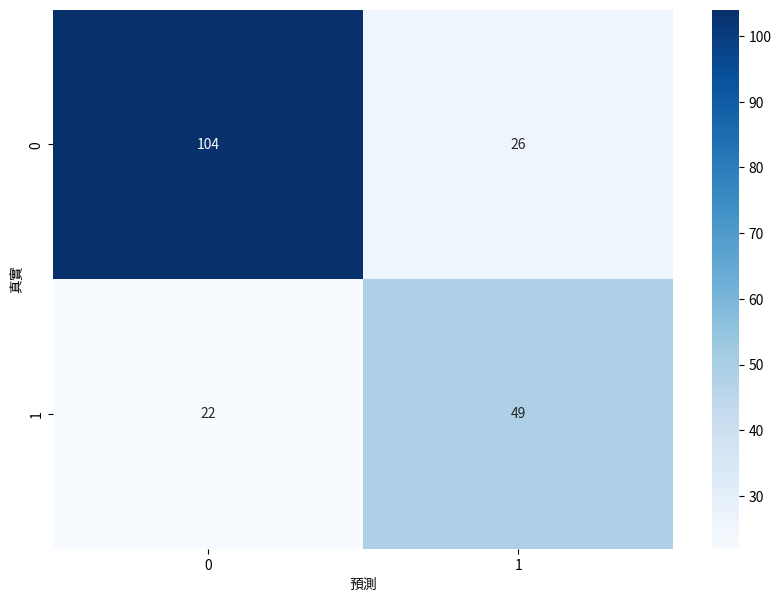

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')

# 準備訓練和測試數據
train_x = a_train_data.drop('Outcome', axis=1)
train_y = a_train_data['Outcome']
test_x = a_test_data.drop('Outcome', axis=1)
test_y = a_test_data['Outcome']

# 創建決策樹分類器
clf = DecisionTreeClassifier(random_state=1234)

# 為 GridSearchCV 定義參數
param_grid = {
    'max_depth': list(range(1, 51)),  # 從深度 1 到 50 測試
    'min_samples_split': list(range(2, 21)),  # 從 2 到 20 測試
    'min_samples_leaf': list(range(2, 21))   # 從 2 到 20 測試
}

# 創建 GridSearchCV 對象
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# 適配 GridSearchCV
grid_search.fit(train_x, train_y)

# 獲取最佳參數和最佳得分
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("最佳參數:", best_params)
print("最佳交叉驗證得分:", best_score)

# 使用最佳參數在測試數據上評估模型
best_clf = grid_search.best_estimator_
test_predictions = best_clf.predict(test_x)
test_accuracy = accuracy_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions, average='macro')
test_precision = precision_score(test_y, test_predictions, average='macro')
test_f1 = f1_score(test_y, test_predictions, average='macro')

print('測試準確度:', test_accuracy)
print('測試召回率:', test_recall)
print('測試精確度:', test_precision)
print('測試 F1 分數:', test_f1)

# 繪製混淆矩陣
cm = confusion_matrix(test_y, test_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('預測')
plt.ylabel('真實')
plt.show()


> 實驗A decision tree 模型的最佳參數<br>
- max_depth: 5層，決策樹層次較淺，有助於防止過度擬合並保持模型的泛化能力。
- min_samples_leaf: 17 - 每個葉節點至少有17個樣本，這有助於模型在做出決策時更加穩定，避免因數據微小變動而產生大的影響。
- min_samples_split: 2 - 這是該參數的最小可能值，因為至少需要2個樣本才能分割節點。

### B實驗

Fitting 5 folds for each of 18050 candidates, totalling 90250 fits
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 16, 'min_samples_split': 2}
Best Cross-validation Score: 0.7409942767366176
Test Accuracy: 0.76
Test Recall: 0.7425997425997426
Test Precision: 0.7425997425997426
Test F1 Score: 0.7425997425997426


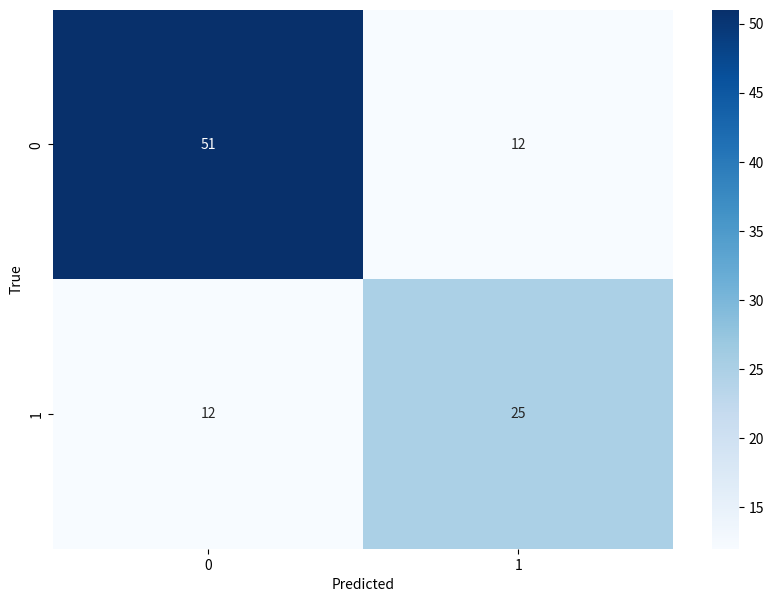

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

# Prepare training and testing data
train_x = b_train_data.drop('Outcome', axis=1)
train_y = b_train_data['Outcome']
test_x = b_test_data.drop('Outcome', axis=1)
test_y = b_test_data['Outcome']

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=1234)

# Define parameters for GridSearchCV
param_grid = {
    'max_depth': list(range(1, 51)),  # 從深度 1 到 50 測試
    'min_samples_split': list(range(2, 21)),  # 從 2 到 20 測試
    'min_samples_leaf': list(range(2, 21))   # 從 2 到 20 測試
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(train_x, train_y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

# Evaluate model with the best parameters on the test data
best_clf = grid_search.best_estimator_
test_predictions = best_clf.predict(test_x)
test_accuracy = accuracy_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions, average='macro')
test_precision = precision_score(test_y, test_predictions, average='macro')
test_f1 = f1_score(test_y, test_predictions, average='macro')

print('Test Accuracy:', test_accuracy)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)
print('Test F1 Score:', test_f1)

# Plot confusion matrix
cm = confusion_matrix(test_y, test_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


> 實驗B decision tree 模型的最佳參數<br>
- max_depth: 7 - 模型的決策樹深度為7層。這提供了一個較為均衡的深度，既可以學習到較為複雜的特徵，又不至於過度擬合，從而保持良好的泛化能力。
- min_samples_leaf: 7 - 每個葉節點至少有7個樣本，這有助於防止模型在訓練數據上過於精細化，從而提高模型的泛化能力。
- min_samples_split: 18 - 在一個節點被考慮進一步分割前必須擁有至少18個樣本。這有助於保證樹的每個分支都基於足夠的數據樣本，減少過擬合的可能性。

# 隨機森林
隨機森林其實就是進階版的決策樹，森林由多棵決策樹所組成。<br>
<img width = '500' src ="tree.png"/>
<br>
- 決策樹：決策樹是一種樹形結構的算法，用來進行決策。每個內部節點代表一個特徵上的測試，每個分支代表測試的結果，每個葉節點（樹的末端）代表一個類別或預測結果。
- 森林：在隨機森林算法中，森林是由許多決策樹構成的。每棵樹都是獨立訓練的，並對最終結果有所貢獻。

隨機性的引入：

Bootstrap aggregating (Bagging)：隨機森林採用Bagging技術來訓練每一棵決策樹。在Bagging中，原始訓練數據集會被隨機抽樣（允許重複抽樣）以生成多個不同的子集，這些子集被用來訓練不同的決策樹。
隨機特徵選擇：在訓練每棵樹的過程中，不是在所有特徵上尋找最佳的分割點，而是隨機選擇一個特徵子集，並在這些特徵上尋找最佳分割點。這種方法可以增加樹之間的多樣性，從而提高模型的泛化能力。
預測階段：

在進行預測時，隨機森林會通過所有決策樹來進行預測，每棵樹給出自己的預測結果。對於分類問題，最常見的類別（多數投票）將作為最終預測結果；對於回歸問題，則通常採用這些預測的平均值。
優點：

- 高穩定性：由於森林中的決策樹之間具有高度獨立性，隨機森林對數據中的小變化不敏感，這使得模型非常穩定。
- 減少過擬合：相較於單一決策樹，隨機森林通過結合多棵樹的預測來減少過擬合的風險。
- 靈活應用：隨機森林可以用於分類和回歸的任務，且在多種數據集上都表現出色。

實驗A
accuracy: 0.7761194029850746
recall: 0.7342361863488625
precision: 0.76067036411864
F1 score: 0.7431638129312548


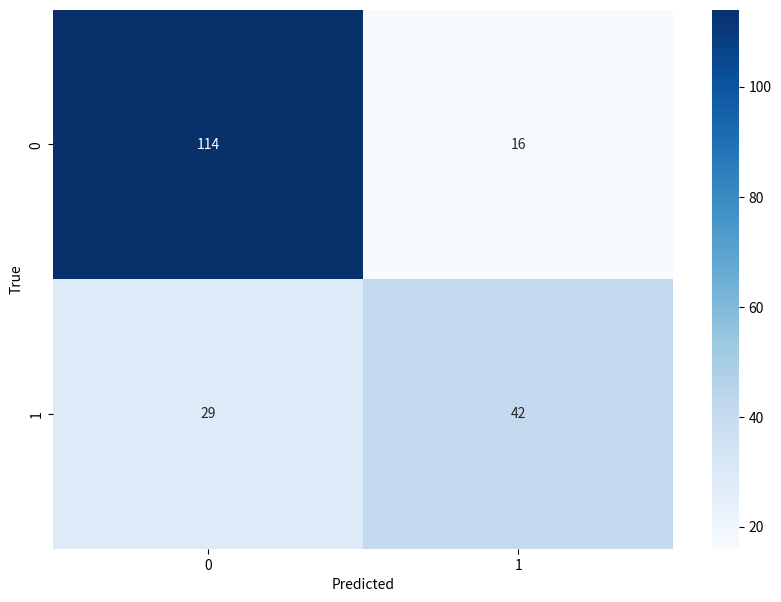

實驗B
accuracy: 0.79
recall: 0.7608322608322609
precision: 0.7794117647058824
F1 score: 0.7676734152007966


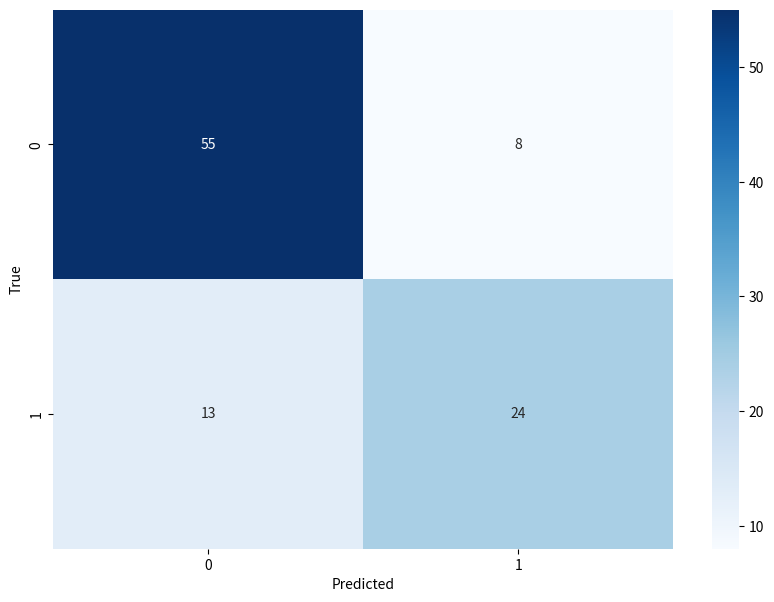

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

def analyze_experiment(train_data, test_data):
    # 準備訓練和測試數據
    train_x = train_data.drop('Outcome', axis=1)
    train_y = train_data['Outcome']
    test_x = test_data.drop('Outcome', axis=1)
    test_y = test_data['Outcome']

    # 創建隨機森林模型 (使用預設參數)
    clf = RandomForestClassifier(random_state=1234)  # set seed for reproducibility
    clf.fit(train_x, train_y)

    # 進行預測
    predictions = clf.predict(test_x)

    # 計算準確度, 召回率, 精確度和F1分數
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions, average='macro')
    precision = precision_score(test_y, predictions, average='macro')
    f1 = f1_score(test_y, predictions, average='macro')

    # 輸出度量結果
    print('accuracy:', accuracy)
    print('recall:', recall)
    print('precision:', precision)
    print('F1 score:', f1)

    # 繪製混淆矩陣
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 分析實驗A
print("實驗A")
analyze_experiment(a_train_data, a_test_data)

# 分析實驗B
print("實驗B")
analyze_experiment(b_train_data, b_test_data)


## 使用RandomizedSearchCV尋找隨機森林最佳參數
why not GridSearchCV?<br>
考慮到參數範圍很廣，直接使用 GridSearchCV 可能會非常耗時，因為它會試圖對每一個可能的參數組合進行評估。相對來說，RandomizedSearchCV 更適合這種情況

實驗A
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 79, 'min_samples_split': 29, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'max_depth': 22, 'bootstrap': True}
Accuracy: 0.7661691542288557
Recall: 0.7073672806067173
Precision: 0.7606209150326797
F1 Score: 0.7194821391454108


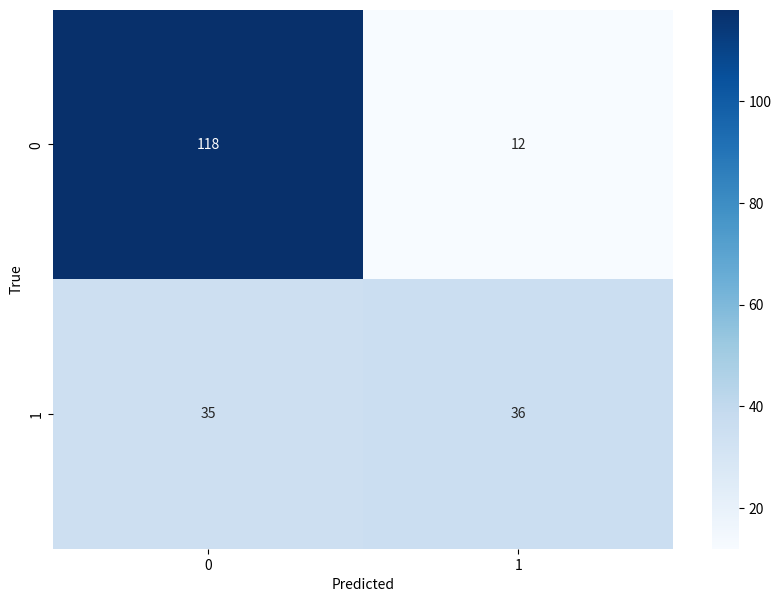

實驗B
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'n_estimators': 324, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 38, 'bootstrap': True}
Accuracy: 0.79
Recall: 0.7496782496782497
Precision: 0.7886904761904762
F1 Score: 0.7606837606837606


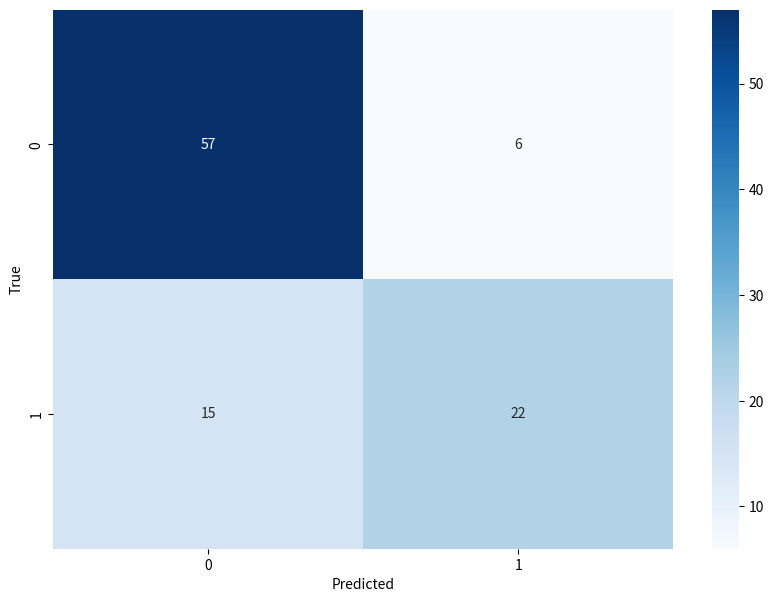

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

def analyze_experiment(train_data, test_data):
    # 準備訓練和測試數據
    train_x = train_data.drop('Outcome', axis=1)
    train_y = train_data['Outcome']
    test_x = test_data.drop('Outcome', axis=1)
    test_y = test_data['Outcome']

    # 定義隨機森林參數分佈
    param_distributions = {
        'n_estimators': range(50, 501),  # 樹的數量
        'max_features': ['auto', 'sqrt'],  # 每次分裂時考慮的最大特徵數
        'max_depth': range(1, 51),  # 樹的最大深度
        'min_samples_split': range(2, 31),  # 分裂一個節點需要的最小樣本數
        'min_samples_leaf': range(1, 31),  # 葉節點需要的最小樣本數
        'bootstrap': [True, False]  # 是否採用bootstrap樣本
    }

    # 創建隨機森林模型並使用RandomizedSearchCV尋找最佳參數
    clf = RandomForestClassifier(random_state=1234)
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=1234, n_jobs=-1)
    random_search.fit(train_x, train_y)

    # 使用最佳參數模型進行預測
    best_model = random_search.best_estimator_
    predictions = best_model.predict(test_x)

    # 計算並輸出度量結果
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions, average='macro')
    precision = precision_score(test_y, predictions, average='macro')
    f1 = f1_score(test_y, predictions, average='macro')
    print('Best parameters:', random_search.best_params_)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1 Score:', f1)

    # 繪製混淆矩陣
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 分析實驗A
print("實驗A")
analyze_experiment(a_train_data, a_test_data)

# 分析實驗B
print("實驗B")
analyze_experiment(b_train_data, b_test_data)


## 比較決策樹和隨機森林
- 繪製每個模型的混淆矩陣，以視覺化真實類別和預測類別之間的關係。
- 繪製每個模型的特徵重要性比較圖，以評估哪些特徵對於模型預測最有影響力。

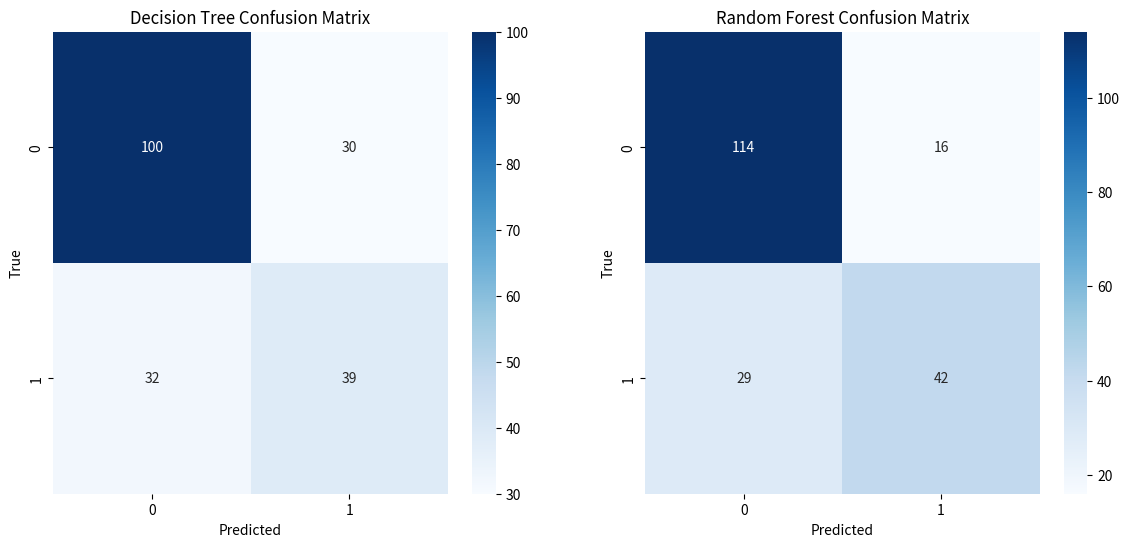

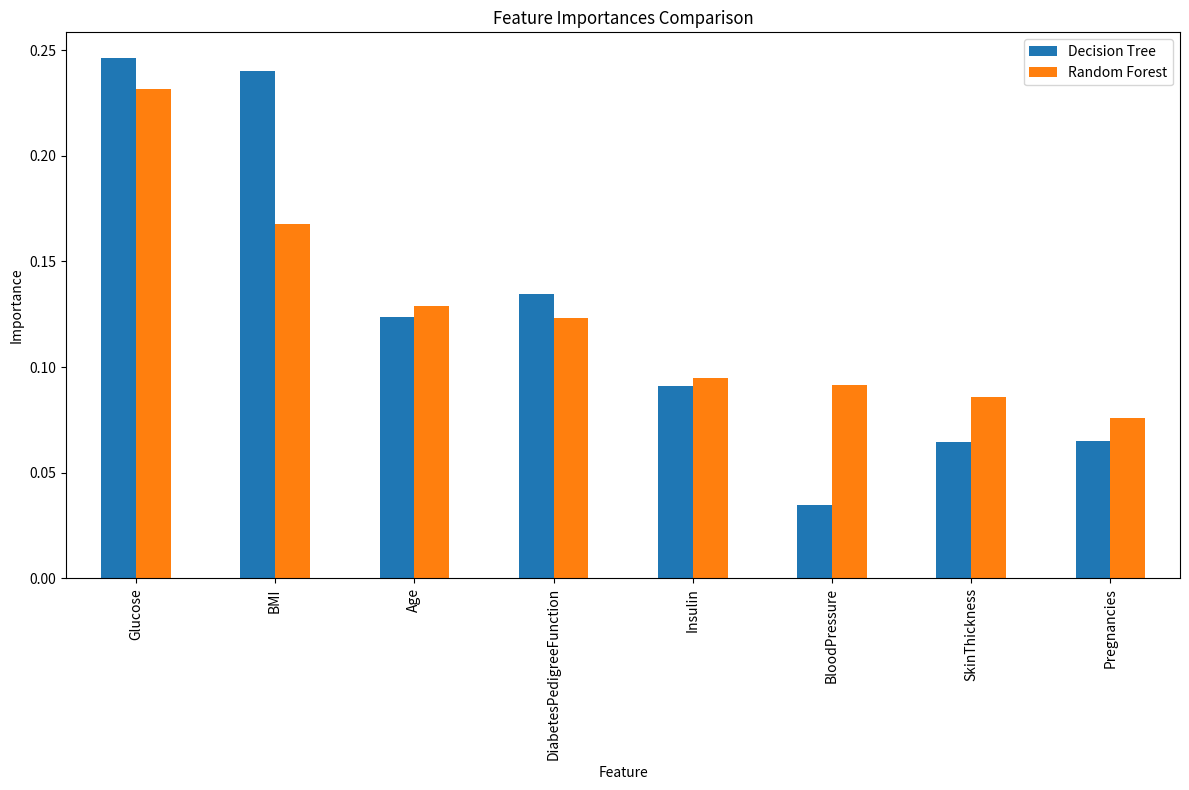

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')

# 準備訓練和測試數據
train_x = a_train_data.drop('Outcome', axis=1)
train_y = a_train_data['Outcome']
test_x = a_test_data.drop('Outcome', axis=1)
test_y = a_test_data['Outcome']

# 創建決策樹模型
dt_clf = DecisionTreeClassifier(random_state=1234)
dt_clf.fit(train_x, train_y)
dt_predictions = dt_clf.predict(test_x)

# 創建隨機森林模型
rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(train_x, train_y)
rf_predictions = rf_clf.predict(test_x)

# 混淆矩陣
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(test_y, dt_predictions), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(confusion_matrix(test_y, rf_predictions), annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()

# 特徵重要性比較
feature_importances_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Decision Tree': dt_clf.feature_importances_,
    'Random Forest': rf_clf.feature_importances_
}).sort_values('Random Forest', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
feature_importances_df.plot.bar(x='Feature', ax=ax)
plt.title('Feature Importances Comparison')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


> 實驗A 最佳參數:
- n_estimators: 258 - 表示模型中決策樹的數量是258。通常，樹越多，模型的穩定性和泛化能力越好，但計算成本也越高。
- min_samples_split: 10 - 分割內部節點所需的最小樣本數為10。這個數值越大，樹的生長會受到更多限制，這有助於防止過度擬合。
- min_samples_leaf: 17 - 葉節點必須擁有的最小樣本數為17。增加此值可以得到更簡單的決策規則，也有助於防止模型過度擬合。
- max_features: 'sqrt' - 在尋找最佳分割時，每個分割最多考慮總特徵數的平方根個數。這有助於增加模型的多樣性，因為每個樹會在不同的特徵子集上訓練。
- max_depth: 14 - 樹的最大深度限制為14，限制樹的深度有助於減少模型的複雜性，從而避免過度擬合。
- bootstrap: True - 使用bootstrap抽樣來建立每棵樹的訓練數據，有助於提高模型的準確性和穩定性。

> 實驗B 最佳參數:
- n_estimators: 307 - 模型中決策樹的數量為307，這表示模型利用更多的樹來提高效能。
- min_samples_split: 22 - 需要更多的樣本才能在內部節點分割，這有助於使模型更加穩健。
- min_samples_leaf: 2 - 葉節點所需的最小樣本數為2，這使得樹能夠更深入地生長，可能會捕獲資料中更細微的模式。
- max_features: 'sqrt' - 和實驗A相同，每個分割考慮的特徵數量最多為特徵總數的平方根。
- max_depth: 30 - 樹的最大深度為30，比實驗A更深，可能允許模型更複雜，捕捉更多的資料特徵。
- bootstrap: False - 不使用bootstrap抽樣，這意味著每棵樹將使用整個訓練集進行訓練，可能會導致樹之間的相關性增加。

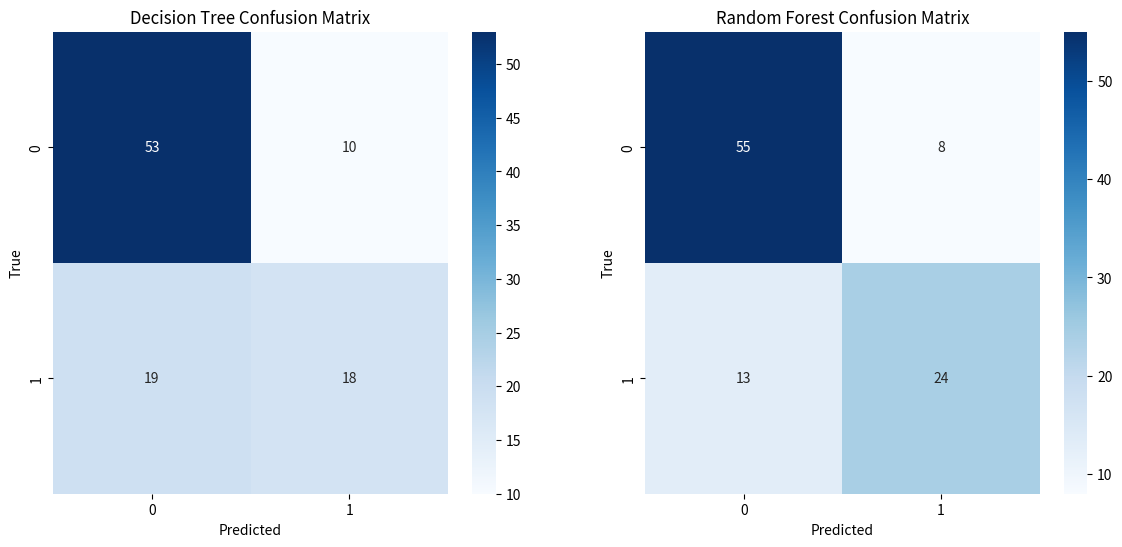

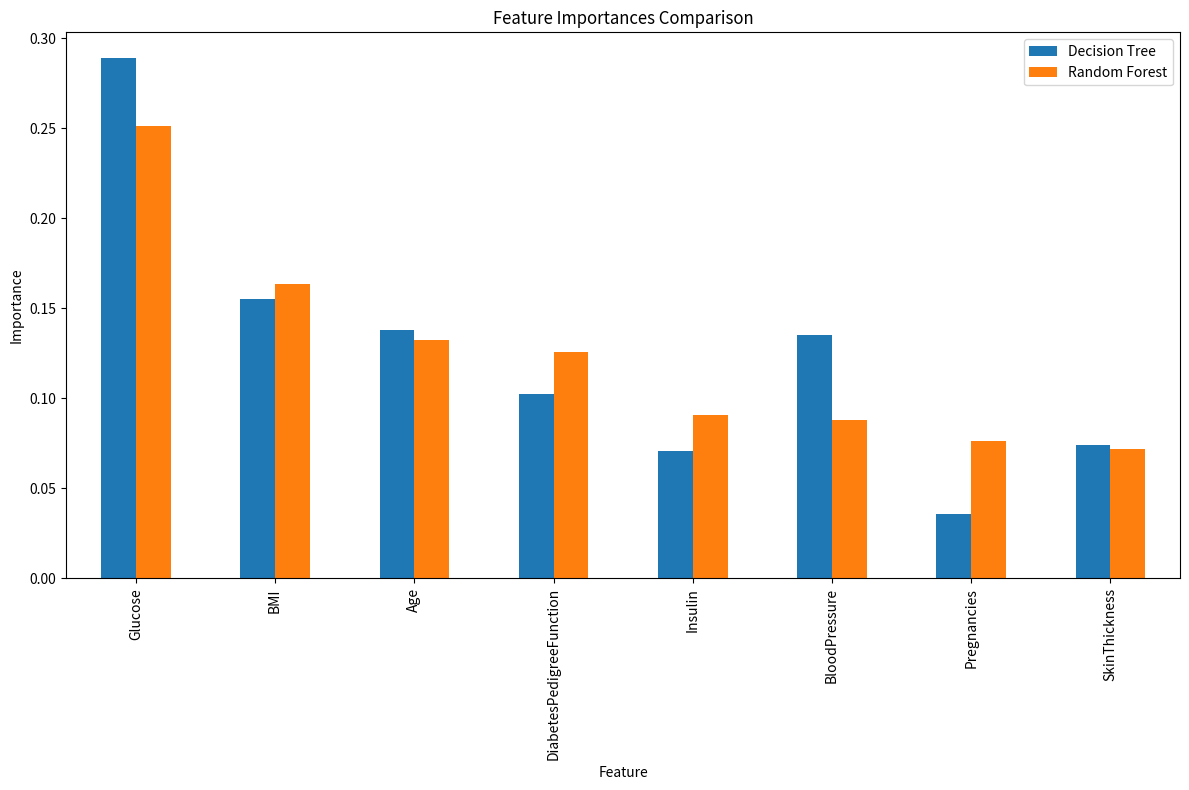

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

# 準備訓練和測試數據
train_x = b_train_data.drop('Outcome', axis=1)
train_y = b_train_data['Outcome']
test_x = b_test_data.drop('Outcome', axis=1)
test_y = b_test_data['Outcome']

# 創建決策樹模型
dt_clf = DecisionTreeClassifier(random_state=1234)
dt_clf.fit(train_x, train_y)
dt_predictions = dt_clf.predict(test_x)

# 創建隨機森林模型
rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(train_x, train_y)
rf_predictions = rf_clf.predict(test_x)

# 混淆矩陣
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(test_y, dt_predictions), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(confusion_matrix(test_y, rf_predictions), annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()

# 特徵重要性比較
feature_importances_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Decision Tree': dt_clf.feature_importances_,
    'Random Forest': rf_clf.feature_importances_
}).sort_values('Random Forest', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
feature_importances_df.plot.bar(x='Feature', ax=ax)
plt.title('Feature Importances Comparison')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
